In [2]:
import gym
from MarkovDecisionProcess import MarkovDecisionProcess as MDP
from Agent import Agent
import matplotlib.pyplot as plt
import numpy as np
# plt.style.use('dark_background')
env = gym.make('FrozenLake-v1')
# env = gym.make('FrozenLake8x8-v1')
# env = gym.make('CartPole-v1')
env.reset()
# env.unwrapped.__dict__
mdp = MDP(env.observation_space.n, env.action_space.n, env.unwrapped.P)
# mdp = MDP(env.observation_space.shape[0]**2, env.action_space.n, env.unwrapped.P)


/usr/local/lib/python3.9/site-packages/ipykernel/pylab/config.py:70: DeprecationWarning: InlineBackend._figure_formats_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_formats_changed(self, name, old, new):


In [3]:
import os
cur_dir = os.getcwd()
mdp_version = "4x4"

/usr/local/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
def run_experiment(env, agent, num_runs=1, render=False):
    tot_reward = [0]
    for _ in range(num_runs):
        observation = 0
        done = False
        env.reset()
        render and env.render()
        reward_per_run = 0
        # print("Started")
        # iter = 0
        while not done:
            action = agent.get_action(observation)
            observation, reward, done, info = env.step(action)
            reward_per_run += reward
            render and env.render()
            # iter+=1
        # print(f"Convergence at {iter}")
        env.close()
        tot_reward.append(reward_per_run + tot_reward[-1])
    return tot_reward


Policy Iteration converged at step 3.
Value Iteration converged at step 117.
True


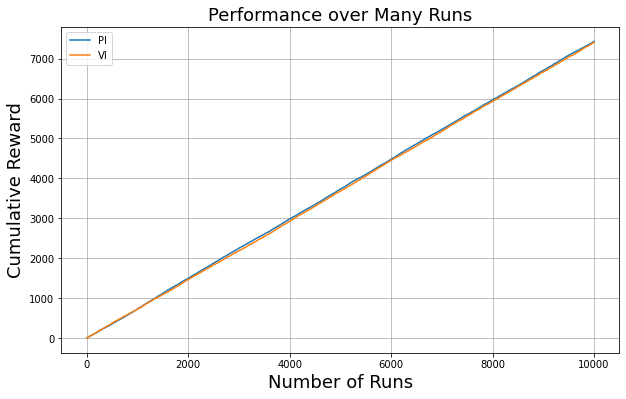

In [17]:
agent1 = Agent(mdp, 1, 0.001)
agent1.policy_iteration()

agent2 = Agent(mdp, 1, 0.001)
agent2.value_iteration()

num_runs = 10000
cumulative_rewards1 = run_experiment(env, agent1, num_runs)
cumulative_rewards2 = run_experiment(env, agent2, num_runs)
print(np.all(agent1.policy == agent2.policy))

fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure and an axes.
ax.plot(range(num_runs+1), cumulative_rewards1, label="PI")
ax.plot(range(num_runs+1), cumulative_rewards2, label="VI")
ax.grid(True)
ax.set_xlabel('Number of Runs', fontsize=18)  # Add an x-label to the axes.
ax.set_ylabel('Cumulative Reward', fontsize=18)  # Add a y-label to the axes.
ax.set_title("Performance over Many Runs", fontsize=18)  # Add a title to the axes.
ax.legend()  # Add a legend.
fig.savefig(cur_dir + '/plots/' + mdp_version + "_Performance over Many Runs")


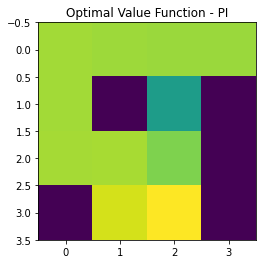

In [52]:
dimensions = (4,4) if mdp_version == "4x4" else (8,8)
X1 = np.reshape(agent1.value_fn, dimensions)
fig, ax = plt.subplots()
ax.imshow(X1, interpolation="nearest")
plt.title("Optimal Value Function - PI")
plt.show()
fig.savefig(cur_dir + '/plots/' + mdp_version + "_Optimal Value Function - PI")

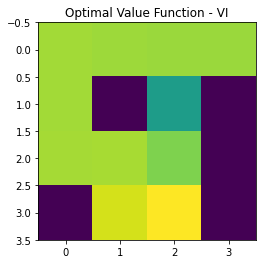

In [53]:
dimensions = (4,4) if mdp_version == "4x4" else (8,8)
X2 = np.reshape(agent2.value_fn, dimensions)
fig, ax = plt.subplots()
ax.imshow(X2, interpolation="nearest")
plt.title("Optimal Value Function - VI")
plt.show()
fig.savefig(cur_dir + '/plots/' + mdp_version + "_Optimal Value Function - VI")

In [54]:
# print(agent1.value_fn)
# print(agent2.value_fn)


In [39]:
import timeit
policy_iteration_setup = '''
import gym
from MarkovDecisionProcess import MarkovDecisionProcess as MDP
from Agent import Agent
env = gym.make('FrozenLake-v1')
env.reset()
mdp = MDP(env.observation_space.n, env.action_space.n, env.unwrapped.P)
agent = Agent(mdp, 1, 0.001)
'''
policy_iteration_code = "agent.policy_iteration()"
value_iteration_setup = '''
import gym
from MarkovDecisionProcess import MarkovDecisionProcess as MDP
from Agent import Agent
env = gym.make('FrozenLake-v1')
env.reset()
mdp = MDP(env.observation_space.n, env.action_space.n, env.unwrapped.P)
agent = Agent(mdp, 1, 0.001)
'''
value_iteration_code = "agent.value_iteration()"


In [40]:
num_runs_options = [1, 10, 50, 100, 500, 1000, 10000]
pi_time = []
vi_time = []
for num_runs in num_runs_options:
    pi_time.append(timeit.timeit(setup=policy_iteration_setup, stmt=policy_iteration_code, number=num_runs))
    vi_time.append(timeit.timeit(setup=value_iteration_setup, stmt=value_iteration_code, number=num_runs))

Policy Iteration converged at step 8.
Value Iteration converged at step 194.
Policy Iteration converged at step 8.
Policy Iteration converged at step 1.
Policy Iteration converged at step 1.
Policy Iteration converged at step 3.
Policy Iteration converged at step 1.
Policy Iteration converged at step 3.
Policy Iteration converged at step 3.
Policy Iteration converged at step 1.
Policy Iteration converged at step 1.
Policy Iteration converged at step 1.
Value Iteration converged at step 194.
Value Iteration converged at step 1.
Value Iteration converged at step 1.
Value Iteration converged at step 1.
Value Iteration converged at step 1.
Value Iteration converged at step 1.
Value Iteration converged at step 1.
Value Iteration converged at step 1.
Value Iteration converged at step 1.
Value Iteration converged at step 1.
Policy Iteration converged at step 13.
Policy Iteration converged at step 3.
Policy Iteration converged at step 2.
Policy Iteration converged at step 1.
Policy Iteration c

In [41]:
print(pi_time, vi_time)

[0.9030164140003762, 1.0750485710000248, 1.651239422999879, 1.908363288000146, 5.902697695999905, 10.48961499699999, 77.83909435099986] [0.11378692400012369, 0.1592241399998784, 0.35279361099992457, 0.6036287370002356, 2.566352395999729, 4.973240252999858, 49.30641505700032]


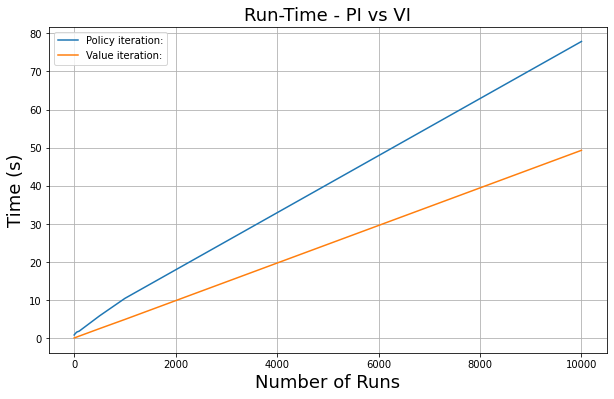

In [42]:
# POLICY IT SHOULD TO BE FASTER THAN VI
fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure and an axes.
ax.plot(num_runs_options, pi_time, label="Policy iteration:")
ax.plot(num_runs_options, vi_time, label="Value iteration:")
ax.grid(False)
ax.set_xlabel('Number of Runs', fontsize=18)
ax.set_ylabel('Time (s)', fontsize=18)
ax.set_title("Run-Time - PI vs VI", fontsize=18)
ax.legend()
ax.grid(True)
fig.savefig(cur_dir + "/plots/" + mdp_version + "_Run-Time - PI vs VI")

# Q-Learning

In [31]:
import random, time
mdp_version = "4x4"
env = gym.make("FrozenLake-v1", is_slippery=True) \
                if mdp_version == "4x4" else gym.make("FrozenLake8x8-v1", is_slippery=True)
env.reset()
# Q-Table dimension: (rows x columns) = (states x actions) = (16 x 4)

nb_states = env.observation_space.n # 16
nb_actions = env.action_space.n # 4

In [32]:
nb_states

16

Duration: 3.976555109024048
Q-table after training:
[[0.00000000e+00 0.00000000e+00 1.52971539e-02 0.00000000e+00]
 [0.00000000e+00 4.23169957e-03 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.73028624e-03]
 [0.00000000e+00 5.23142533e-04 0.00000000e+00 0.00000000e+00]
 [1.57224167e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.84592201e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.24357095e-02]
 [0.00000000e+00 0.00000000e+00 4.69196933e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 7.41964653e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 6.18430625e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 5.54139682e-01]
 [0

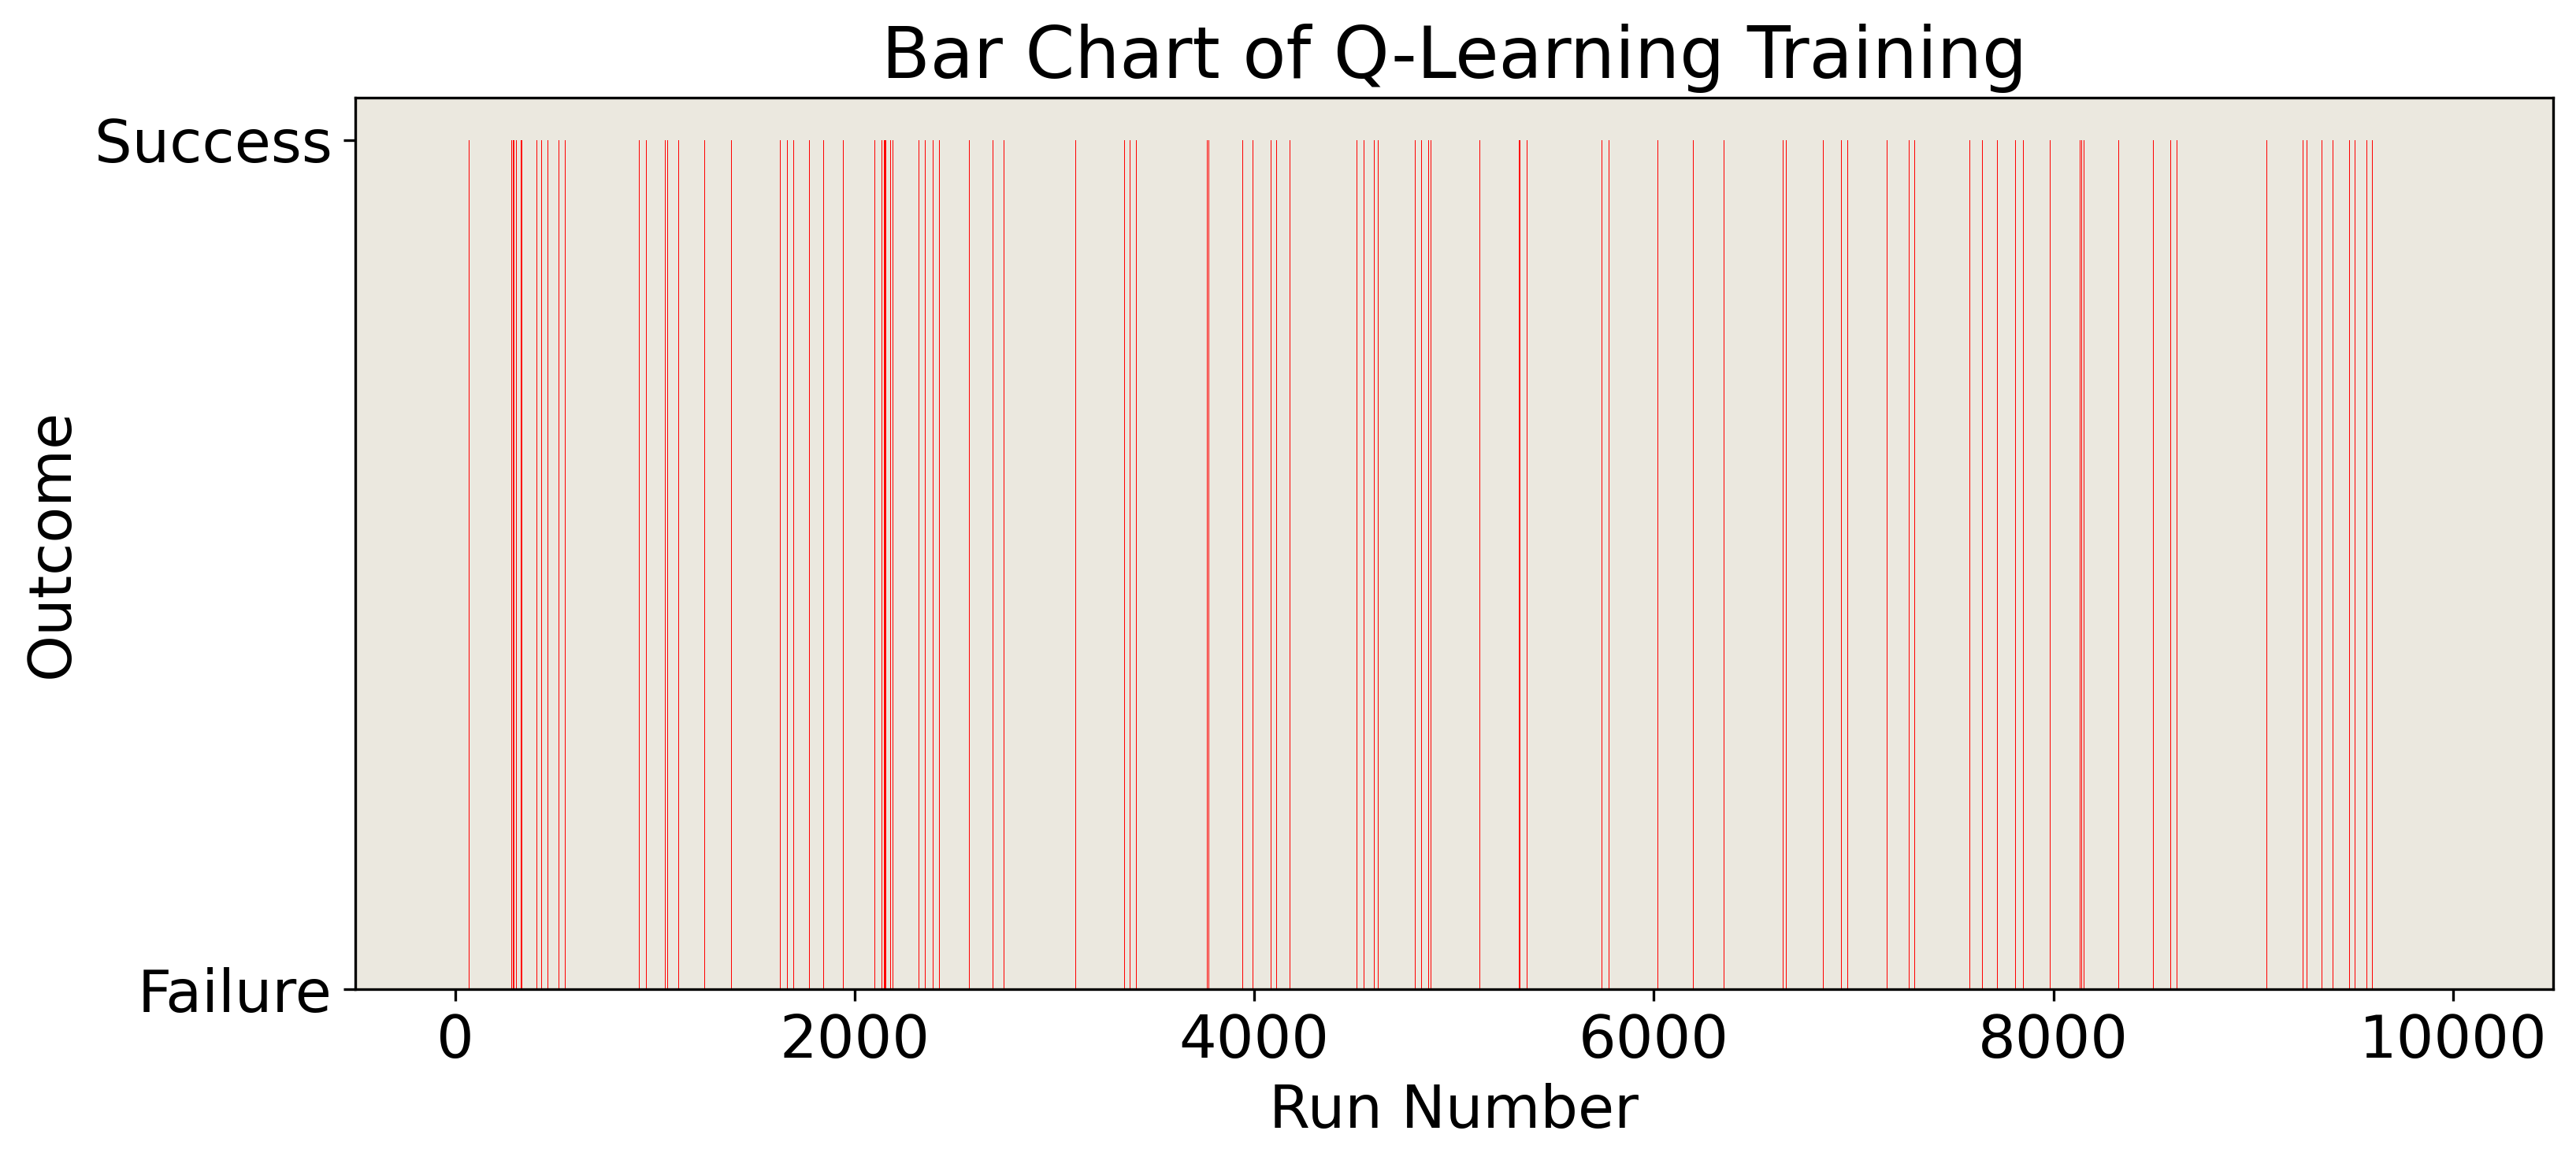

In [33]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.size': 18})
qtable = np.zeros((nb_states, nb_actions))
# Hyperparameters
episodes = 10000
alpha = 0.5 # Learning rate
gamma = 0.9 # Discount rate

# List of outcomes to plot
outcomes = []

# TRAINING
s_t = time.time()
for _ in range(episodes):
    state = env.reset()
    done = False

    # By default, we consider our outcome to be a failure
    outcomes.append("Failure")
    # Until the agent gets stuck in a hole or reaches the goal, keep training it
    while not done:
        # Choose the action with the highest value in the current state
        if np.max(qtable[state]) > 0:
          action = np.argmax(qtable[state])
        # If there's no best action (only zeros), take a random one
        else:
          action = env.action_space.sample()
        # Implement this action and move the agent in the desired direction
        new_state, reward, done, info = env.step(action)

        # Update Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])
        # Update our current state
        state = new_state
        # If we have a reward, it means that our outcome is a success
        if reward:
          outcomes[-1] = "Success"
e_t = time.time()
print(f"Duration: {e_t - s_t}")

print('Q-table after training:')
print(qtable)

# Plot outcomes
plt.figure(figsize=(12, 5))
plt.title("Bar Chart of Q-Learning Training")
plt.xlabel("Run Number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#ebe8df')
plt.bar(range(len(outcomes)), outcomes, color="red", width=1.0)
plt.savefig(cur_dir + "/plots/" + mdp_version + "_Q-Learning_Training")

In [34]:
episodes = 10000
nb_success = 0

# EVALUATION
for _ in range(episodes):
    state = env.reset()
    done = False
    # Until the agent gets stuck or reaches the goal, keep training it
    while not done:
        # Choose the action with the highest value in the current state
        if np.max(qtable[state]) > 0:
          action = np.argmax(qtable[state])
        # If there's no best action (only zeros), take a random one
        else:
          action = env.action_space.sample()
        # Implement this action and move the agent in the desired direction
        new_state, reward, done, info = env.step(action)
        # Update our current state
        state = new_state
        # When we get a reward, it means we solved the game
        nb_success += reward

# Let's check our success rate!
print (f"Success Rate: {nb_success / episodes * 100}%")

Success Rate: 4.09%


### Epsilon-decay

#### Training

Duration: 9.43887710571289
Q-table after training:
[[8.68518660e-02 3.59139678e-03 3.82742184e-03 2.91695218e-03]
 [1.63373944e-03 1.10496794e-03 1.25002320e-03 5.17349163e-02]
 [1.34025309e-03 6.86040926e-02 1.18549649e-03 1.34681229e-03]
 [5.87639085e-04 7.08877602e-04 6.13924742e-04 2.25272394e-02]
 [1.34645690e-01 3.23131052e-03 4.98277057e-03 3.47691114e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.08279893e-02 2.24754551e-04 2.87984104e-04 2.18462356e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.03664038e-03 8.24837161e-03 5.30138256e-03 1.84701096e-01]
 [1.25600404e-02 3.20416965e-01 1.20105822e-02 1.57721821e-02]
 [1.80961989e-01 6.30873584e-03 7.56355217e-03 5.77981017e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.25434901e-02 4.11009077e-02 5.35556320e-01 6.80855321e-02]
 [1.18640435e-01 8.14548396e-01 1.25841810e-01 1.11569214e-01]
 [0.

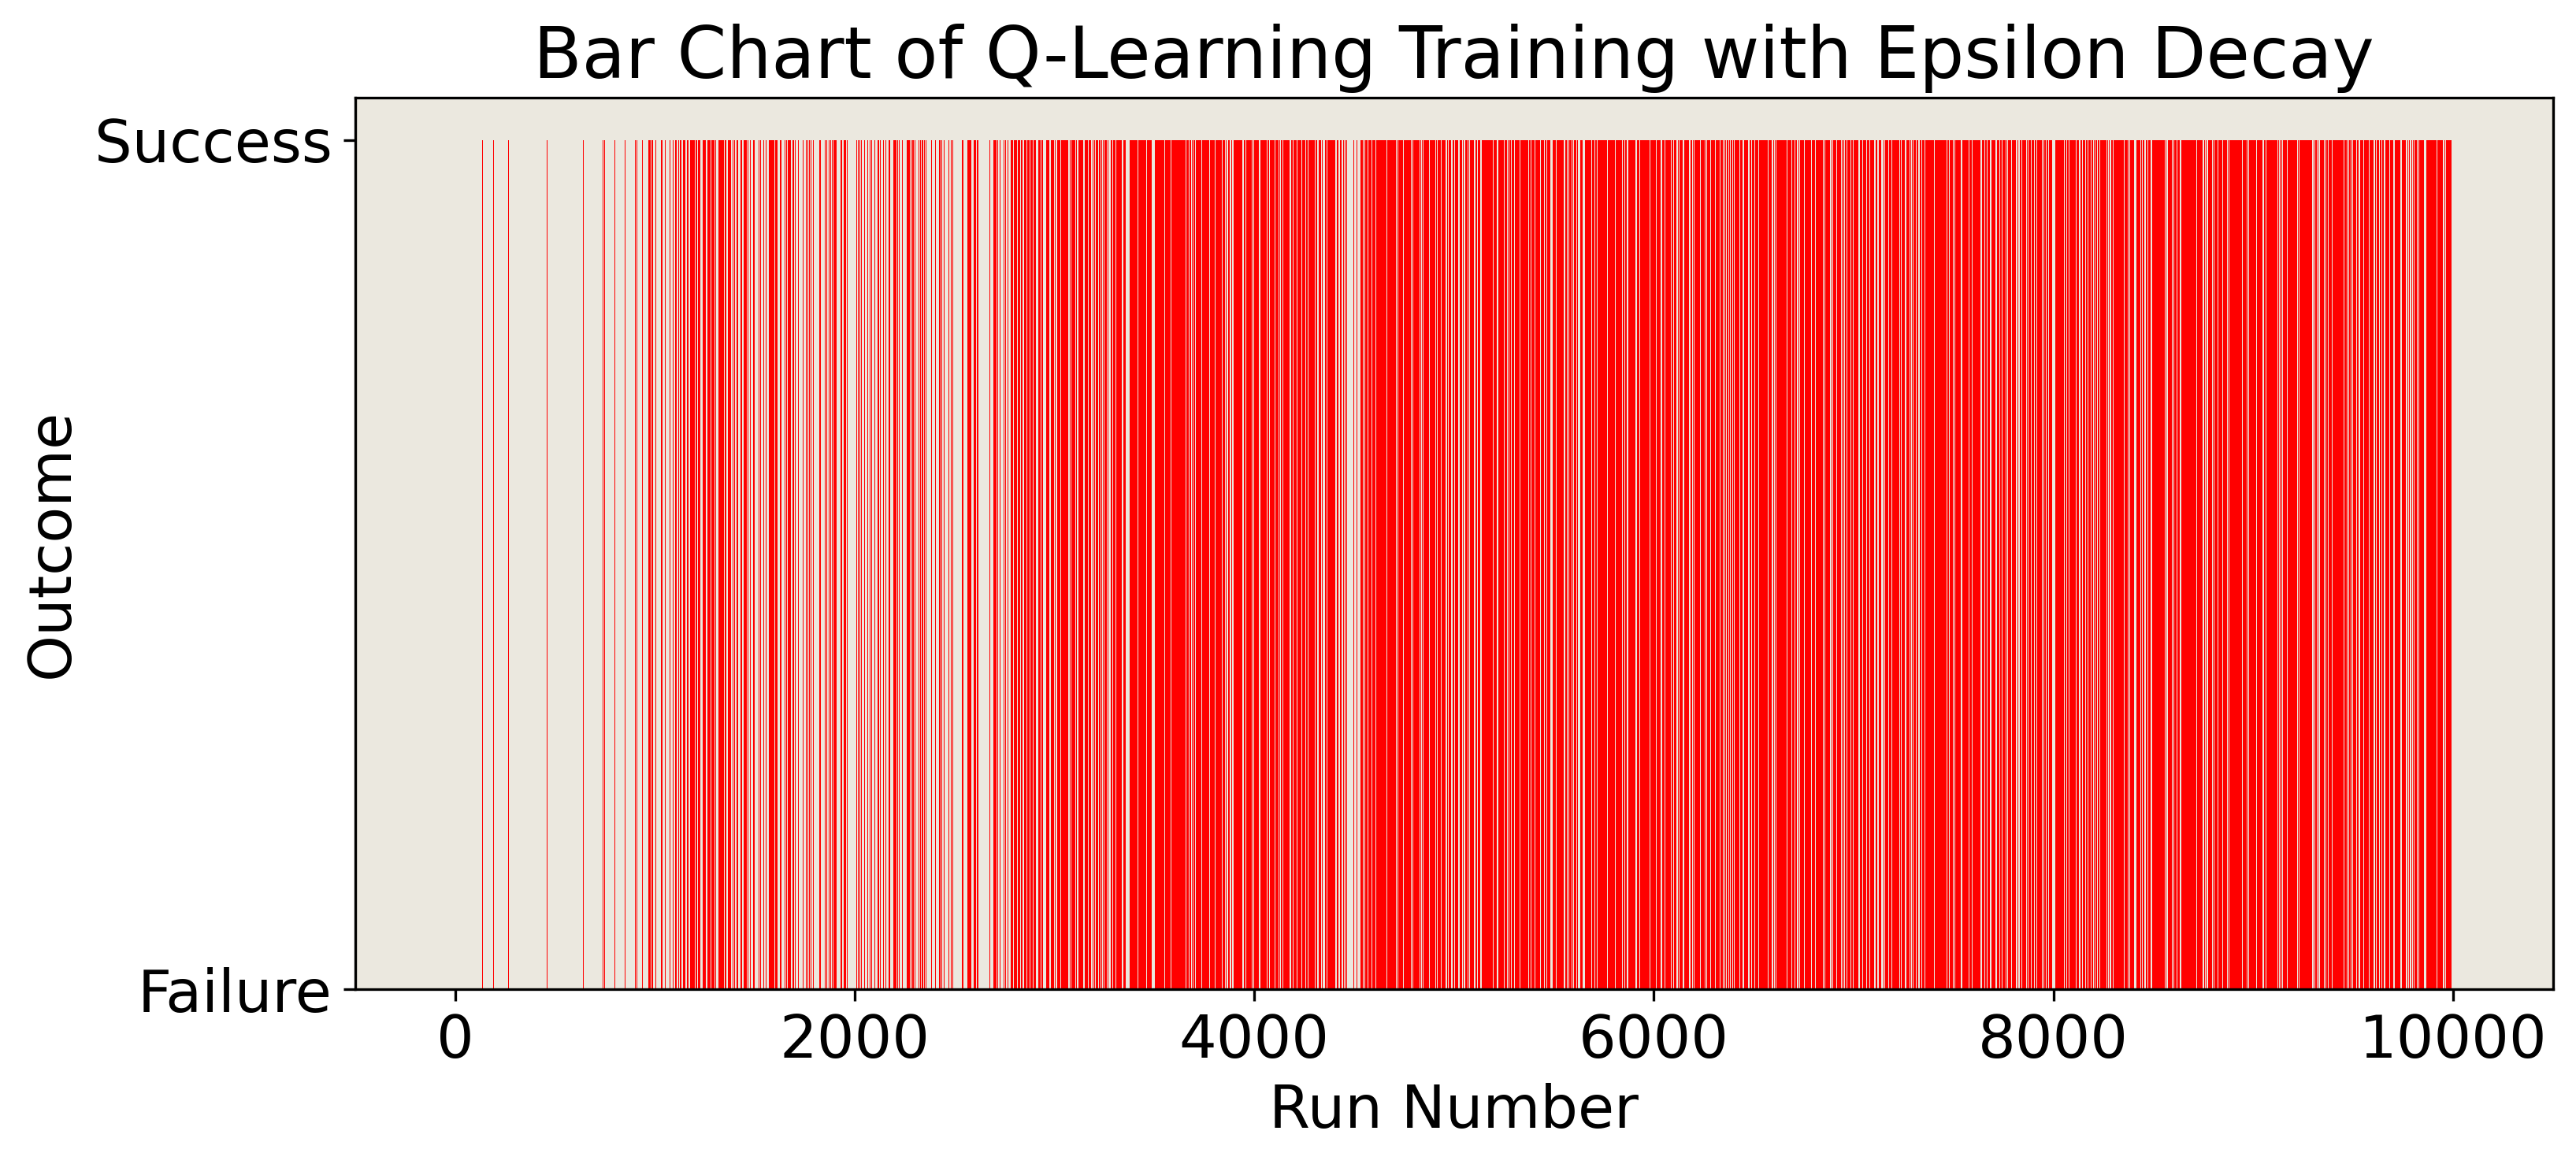

In [35]:
qtable = np.zeros((env.observation_space.n, env.action_space.n))

# Hyperparameters
episodes = 10000
alpha = 0.5 # Learning rate
gamma = 0.9 # Discount rate
epsilon = 1.0 # Amount of randomness in choosing next action
epsilon_decay = 0.001  # Linear decay

# List of outcomes to plot
outcomes = []

# TRAINING #2
s_t = time.time()
for _ in range(episodes):
    state = env.reset()
    done = False
    # By default, we consider our outcome to be a failure
    outcomes.append("Failure")
    # Until the agent gets stuck in a hole or reaches the goal, keep training it
    while not done:
        rnd = np.random.random()
        if rnd < epsilon:
          action = env.action_space.sample()
        # Else, take the action with the highest value in the current state
        else:
          action = np.argmax(qtable[state])
        # Implement this action and move the agent in the desired direction
        new_state, reward, done, info = env.step(action)
        # Update Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])
        # Update our current state
        state = new_state
        # If we have a reward, it means that our outcome is a success
        if reward:
          outcomes[-1] = "Success"

    # Update epsilon
    epsilon = max(epsilon - epsilon_decay, 0)

e_t = time.time()
print(f"Duration: {e_t - s_t}")

print('Q-table after training:')
print(qtable)

# Plot outcomes
plt.figure(figsize=(12, 5))
plt.title("Bar Chart of Q-Learning Training with Epsilon Decay")
plt.xlabel("Run Number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#ebe8df')
plt.bar(range(len(outcomes)), outcomes, color="red", width=1.0)
plt.savefig(cur_dir + "/plots/" + mdp_version + "_Q-Learning_Training_with_Decay")

#### Evaluation

In [36]:
episodes = 10000
nb_success = 0

# EVALUATION #2
for _ in range(episodes):
    state = env.reset()
    done = False
    # Until the agent gets stuck or reaches the goal, keep training it
    while not done:
        # Choose the action with the highest value in the current state
        action = np.argmax(qtable[state])
        # Implement this action and move the agent in the desired direction
        new_state, reward, done, info = env.step(action)
        # Update our current state
        state = new_state
        # When we get a reward, it means we solved the game
        nb_success += reward

# Let's check our success rate!
print (f"Success Rate: {nb_success / episodes * 100}%")


Success Rate: 73.28%
